In [46]:
%matplotlib inline



# Reconnaitre les chiffres manuscriste

Cet exemple montre comment scikit-learn peut être utilisé pour reconnaître 
des images de chiffres manuscrits, de 0 à 9..


## Le Dataset Digits 

L'ensemble de données de chiffres se compose d'images de chiffres de 8x8 pixels.
L' imagesattribut de l'ensemble de données stocke des tableaux 8x8 de valeurs de niveaux de gris pour chaque image. 
Nous allons utiliser ces tableaux pour visualiser les 4 premières images. 
L' targetattribut de l'ensemble de données stocke le chiffre que chaque image représente et cela est inclus dans le titre des 4 tracés ci-dessous.

# Remarque: 
si nous travaillions à partir de fichiers image (par exemple, des fichiers 'png'), nous les chargerions en utilisant matplotlib.pyplot.imread.


## Analyse Exploratoire du jeu de données

Dans cette partie nous allons voir les comportements de nos données

In [47]:
# Auteur: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Importations scientifiques Python standard
import matplotlib.pyplot as plt

# Importation du dataset, du classificateur et du metric de performance
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [48]:
digits = datasets.load_digits()
#voir l'ensemble des données incluses
digits.data
#voir la taille des données incluses
digits.data.shape
#voir l'ensemble des images incluse
digits.images
#voir la taille des images incluses
digits.images.shape

(1797, 8, 8)

In [49]:
#Affichage nbre de données, et dimensions des images
print("image data shapes",digits.data.shape)

image data shapes (1797, 64)


In [50]:
svc = svm.SVC(gamma=0.001, C=100.)
main_data = digits['data']
targets = digits['target']


digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [51]:
# # plt.cm.Accent
# import seaborn as sns
# plt.figure(figsize=(200,200))
# plt.title('Correlation', y=1.05, size=15)
# sns.heatmap(digits.corr(), annot=True)
# plt.show()

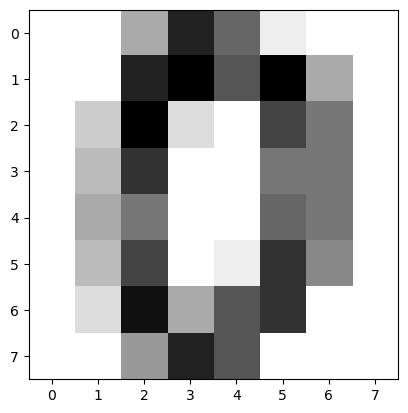

In [52]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

:func:`~sklearn.metrics.classification_report` construit un rapport texte montrant
les principaux paramètres de classification.



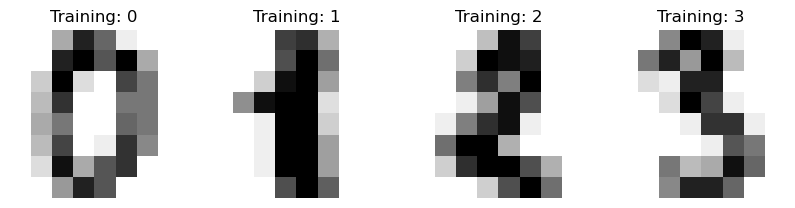

In [53]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

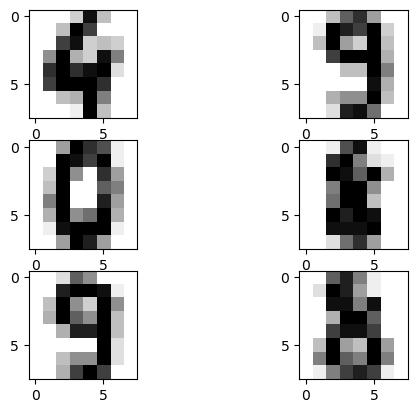

In [54]:
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')

In [55]:


digits.target



array([0, 1, 2, ..., 8, 9, 8])

In [56]:
digits.target.size

1797

## Classification

Pour appliquer un classificateur sur ces données, nous devons aplatir les images, en transformant chaque tableau 2D de valeurs en niveaux de gris de forme ``(8, 8)`` en forme
``(64,)``. Par la suite, l'ensemble de données sera de forme
``(n_samples, n_features)``, ou ``n_samples`` est le nombre d'images et
``n_features`` est le nombre total de pixels dans chaque image.

Nous pouvons ensuite diviser les données en sous-ensembles d'entraînement et de test et adapter un support
classificateur de vecteur sur les échantillons de train. Le classificateur équipé peut
être ensuite utilisé pour prédire la valeur du chiffre pour les échantillons
dans le sous-ensemble de test.



In [57]:
# aplatir les images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Créer un classificateur : un classificateur de vecteur de support
clf = svm.SVC(gamma=0.001)

# Répartir les données en sous-ensembles 50 % d'entraînement et 50 % de test
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Apprenez les chiffres sur le sous-ensemble de train
clf.fit(X_train, y_train)

# Prédire la valeur du chiffre sur le sous-ensemble de test
predicted = clf.predict(X_test)

Ci-dessous, nous visualisons les 4 premiers échantillons de test et montrons leur prédiction
valeur numérique dans le titre.



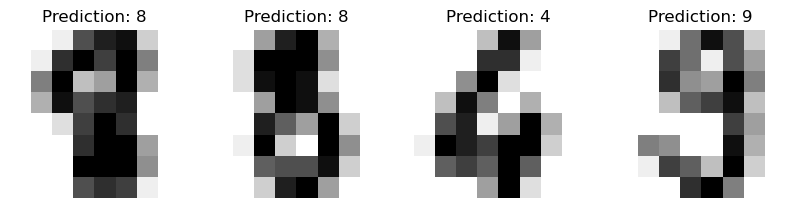

In [58]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [59]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




On peut aussi tracer un `confusion matrix <confusion_matrix>`  pour
les valeurs numériques réelles et les valeurs numériques prédites.


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


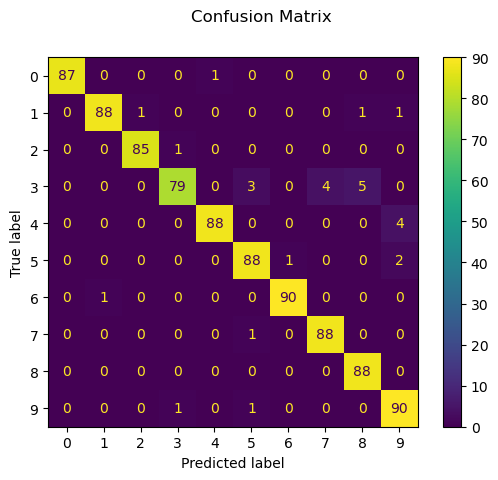

In [60]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [61]:
# Données d'entrainement = 1790 , Données de validation = 6
svc.fit(main_data[:1790] , targets[:1790])
# prédire sur les données de test
predictions = svc.predict(main_data[1791:])
# vérification du résultat
predictions , targets[1791:] 

(array([4, 9, 0, 8, 9, 8]), array([4, 9, 0, 8, 9, 8]))

In [62]:
accuracy_score(targets[1791:] , predictions)*100

100.0

In [63]:
# Données d'entrainement = 1600 ,  Données de validation = 197
svc.fit(main_data[:1600] , targets[:1600])
# prédire sur les données de test
predictions2 = svc.predict(main_data[1601:])
# vérification du résultat 
predictions2 , targets[1601:] 

(array([6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9, 9, 1, 5, 0, 9, 5, 2, 8, 0, 1, 7,
        6, 3, 2, 1, 7, 9, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
        6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 8, 5, 9, 4, 5, 0, 8, 9, 8,
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 8, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
        7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 8, 8, 7, 5, 3, 4, 6,
        6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
        6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 5, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5,
        4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8]),
 array([6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 0, 1, 7,
        6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
        6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8,
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5

In [64]:
accuracy_score(targets[1601:] , predictions2)*100

94.89795918367348

In [65]:
# Données d'entrainement = 1500 ,Données de Validation = 297
svc.fit(main_data[:1500] , targets[:1500])
# prédire sur les données de test 
predictions3 = svc.predict(main_data[1501:])
# vérification du résultat 
predictions3 , targets[1501:] 

(array([7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1,
        7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8,
        0, 1, 2, 3, 4, 5, 6, 7, 1, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 1, 9, 4, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
        5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 8, 3, 7, 3, 3, 4, 6, 6, 6,
        9, 9, 1, 5, 0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 9, 6, 3, 1, 3,
        9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2,
        2, 5, 7, 8, 5, 9, 4, 5, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 8, 4, 5, 6, 7, 8, 9, 0, 9,
        5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8,
        2, 0, 1, 2, 6, 8, 8, 7, 5, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2,
        8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
        5, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9,
        5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [66]:
accuracy_score(targets[1501:] , predictions3)*100

95.27027027027027

In [67]:
((accuracy_score(targets[1791:] , predictions)*100)
 +(accuracy_score(targets[1601:] , predictions2)*100)
 + (accuracy_score(targets[1501:] , predictions3)*100))/3

96.72274315131459